In [1]:
# https://www.tensorflow.org/tutorials/keras/regression

In [2]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/Users/adeela/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
data = pd.read_csv(dataset_path, names = column_names, 
                  na_values="?", comment="\t", 
                  sep = " ", skipinitialspace=True)

In [5]:
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

Horsepower    6
dtype: int64

In [7]:
len(data)

398

In [8]:
data = data.dropna()

In [9]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [11]:
for col in data.columns:
    print(col , data[col].unique())

MPG [18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 33.8 32.7 23.7 32.4 26.6 25.8 23.5 39.1 39.  35.1
 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4 34.  38.
 44. ]
Cylinders [8 4 6 3 5]
Displacement [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
 232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.   91.
  97.5  70.  120.   96.   98.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.

In [12]:
# lets make cylinder and origin categorical 

data['Origin'] = pd.Categorical(data['Origin'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           392 non-null    float64 
 1   Cylinders     392 non-null    int64   
 2   Displacement  392 non-null    float64 
 3   Horsepower    392 non-null    float64 
 4   Weight        392 non-null    float64 
 5   Acceleration  392 non-null    float64 
 6   Model Year    392 non-null    int64   
 7   Origin        392 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 25.0 KB


NameError: name 'plt' is not defined

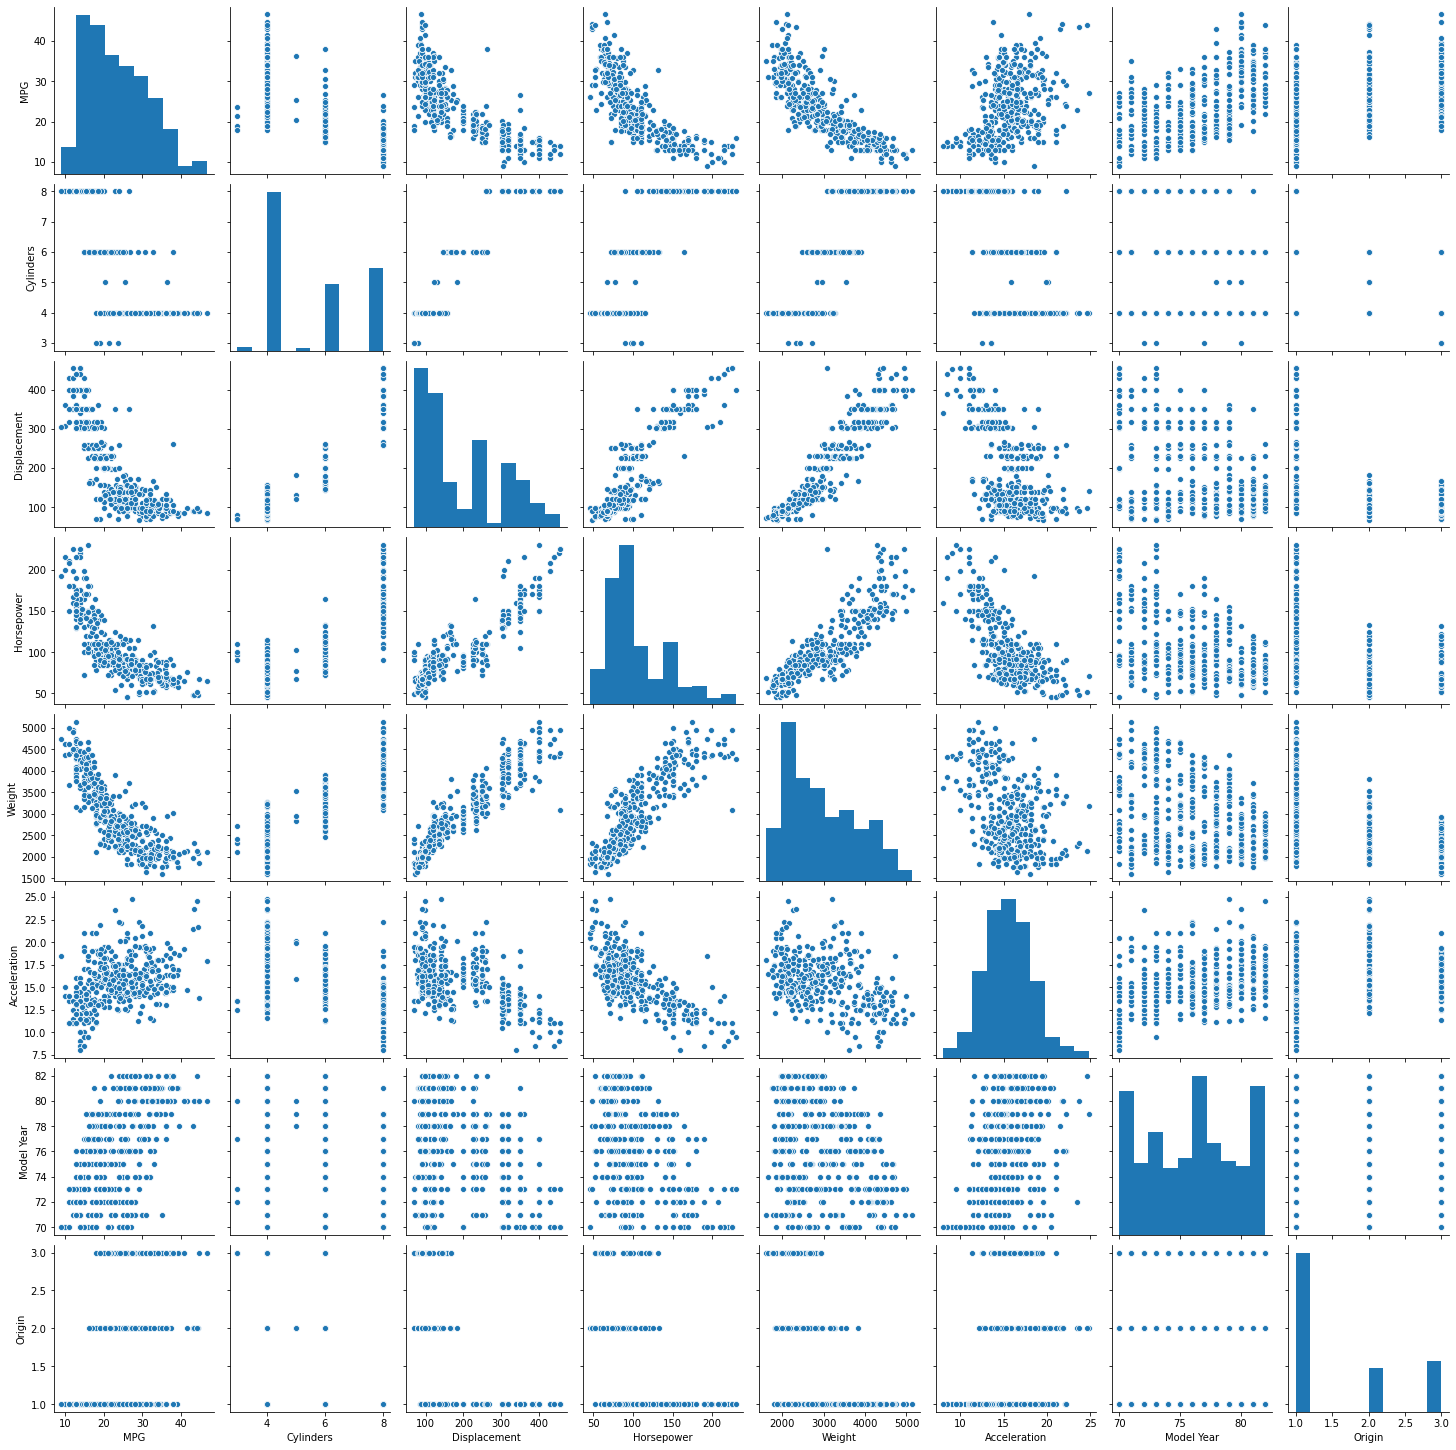

In [14]:
sns.pairplot(data)
plt.show()

In [ ]:
data.describe()

In [ ]:
data = pd.get_dummies(data, prefix='origin_', drop_first=True)

In [ ]:
## SPLIT BETWEEN Train & Test Samples

In [ ]:
train_data = data.sample(frac=0.8, random_state=0)

In [ ]:
test_data = data.drop(train_data.index)

In [ ]:
train_labels = train_data.pop('MPG')

In [ ]:
test_labels = test_data.pop('MPG')

In [ ]:
type(train_data), type(train_labels)

In [ ]:
## Normalize Data

In [ ]:
train_stats = train_data.describe().T

In [ ]:
def normalize(x):
    return (x - train_stats['mean'])/train_stats['std']

In [ ]:
train_data = normalize(train_data)
test_data = normalize(test_data)

In [ ]:
train_data.shape

In [ ]:
## Build Model

In [ ]:
# build model 
input_layer = tf.keras.layers.Dense(units = 64, input_shape= [train_data.shape[1]], activation=tf.nn.relu)
hidden_layer = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)
output_layer = tf.keras.layers.Dense(units = 1)

In [ ]:
model = tf.keras.Sequential([input_layer, hidden_layer, output_layer])

In [ ]:
model.compile(loss='mean_squared_error', optimizer="adam", metrics=['mse', 'mae'])

In [ ]:
type(train_data), type(train_labels)

In [ ]:
# len(train_data.keys())

In [ ]:
# model.summary()

In [ ]:
model.fit(train_data, train_labels,epochs=5)

In [ ]:
model.summary()

In [ ]:
test_pred = model.predict(test_data)